## Examen Final EDA Marouane Bouriel

### 1. Exploration des données 


In [2]:
import pandas as pd
import numpy as np

In [5]:
# Charger le dataset et afficher 10 lignes aléatoires pour un aperçu. 

df = pd.read_excel('SKINS.xlsx')
df.sample(10)

,AGE,Ville,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
248,59,Shangai,0.0,4.8244,5.8134,127.0,8.0854,9.0966,0.0000,0.0000,...,6.7732,57.6021,5.6482,8.8768,6.4174,199.5,12.7726,14.3511,347327.5,347.1360
202,30,Shenzen,47881.5,4.5724,6.0214,147.5,11.7696,11.2534,5.5310,19.6431,...,21.1161,66.3875,7.0583,7.7739,6.6599,205.0,18.9324,13.9518,338904.0,357.2985
96,29,Shangai,0.0,5.4392,5.6521,81.5,6.6319,10.6860,0.0000,0.0000,...,12.0890,58.7983,7.6927,11.3764,6.7861,217.5,17.2574,15.4781,511626.5,518.4060
218,30,Shangai,41801.0,2.6829,5.3312,91.0,6.7888,9.4494,4.0130,8.1928,...,32.9782,67.7143,5.3405,6.0834,6.1303,186.0,11.9122,10.9970,395267.0,419.9425
161,24,Shangai,67709.0,3.4565,5.7649,84.5,9.7261,11.4052,4.2141,11.6666,...,35.3777,69.8020,6.3727,4.7612,6.0887,209.0,13.9801,12.8582,350783.0,390.0415
69,24,Europe,54365.5,5.3965,6.2949,127.5,14.0597,10.6455,5.5690,17.1828,...,40.1531,73.6581,6.8807,10.1313,6.5970,222.5,15.3148,14.6307,453370.5,448.6730
171,25,Shenzen,26466.0,2.9943,5.5488,83.0,9.3175,11.2651,4.2582,12.2128,...,21.2001,63.7983,7.7302,7.4496,6.5318,211.5,19.0253,12.8475,343401.5,400.9400
71,61,Europe,206211.0,3.9655,6.1248,139.0,12.7352,9.0131,6.3299,8.3341,...,30.6052,70.6214,9.5409,6.8807,6.5855,208.5,18.5567,13.6376,409496.0,434.5195
231,26,Shenzen,0.0,2.6772,5.2568,85.5,6.2134,10.7740,0.0000,0.0000,...,28.5269,68.1091,6.6782,6.9221,6.2371,197.0,16.3673,10.8225,311520.5,347.7155
199,21,Shangai,56037.0,3.3337,5.3914,67.0,6.6107,11.3898,3.1500,7.6012,...,28.9168,67.3566,7.0017,5.5884,6.2613,209.0,17.4472,8.1455,504986.0,521.2050


In [6]:
# Identifier les doublons dans le DataFrame
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons : {nb_doublons}")

# Si doublons, suppression des doublons
if nb_doublons > 0:
    df = df.drop_duplicates()
    print("Doublons supprimés.")
else:
    print("Aucun doublon à supprimer.")

Nombre de doublons : 0
Aucun doublon à supprimer.


In [130]:
# Détection des incohérences logiques dans le DataFrame
# 1. SalePrice = 0 (prix de vente nul, incohérent)
incoh_SalePrice = df[df['SalePrice'] == 0]

# 2. LotArea = 0 (surface du terrain nulle, incohérent)
incoh_LotArea = df[df['LotArea'] == 0]

# 3. Années incohérentes : Année de rénovation < Année de construction
incoh_annees = df[df['YearRemodAdd'] < df['YearBuilt']]
# 4. Surface habitable (GrLivArea) nulle ou négative
incoh_GrLivArea = df[df['GrLivArea'] <= 0]

# 5. Nombre de chambres négatif
incoh_BedroomAbvGr = df[df['BedroomAbvGr'] < 0]

# 6. Année de vente < année de construction
incoh_annee_vente = df[df['YrSold'] < df['YearBuilt']]

# 7. Garage construit avant la maison
incoh_garage = df[(df['GarageYrBlt'].notnull()) & (df['GarageYrBlt'] < df['YearBuilt'])]

# 8. Surface du garage négative
incoh_GarageArea = df[df['GarageArea'] < 0]

# Affichage des résultats
print(f"Nombre de lignes avec SalePrice = 0 : {len(incoh_SalePrice)}")
print(f"Nombre de lignes avec LotArea = 0 : {len(incoh_LotArea)}")
print(f"Nombre de lignes avec YearRemodAdd < YearBuilt : {len(incoh_annees)}")
print(f"Nombre de lignes avec GrLivArea <= 0 : {len(incoh_GrLivArea)}")
print(f"Nombre de lignes avec BedroomAbvGr < 0 : {len(incoh_BedroomAbvGr)}")
print(f"Nombre de lignes avec YrSold < YearBuilt : {len(incoh_annee_vente)}")
print(f"Nombre de lignes avec GarageYrBlt < YearBuilt : {len(incoh_garage)}")
print(f"Nombre de lignes avec GarageArea < 0 : {len(incoh_GarageArea)}")

# Explication :
# On utilise des filtres sur le DataFrame pour détecter les valeurs aberrantes ou incohérentes.
# - SalePrice = 0 : On cherche les ventes à prix nul, ce qui est illogique.
# - LotArea = 0 : Un terrain de surface nulle n'est pas possible.
# - YearRemodAdd < YearBuilt : La rénovation ne peut pas précéder la construction.
# - GrLivArea <= 0 : surface habitable nulle ou négative.
# - BedroomAbvGr < 0 : nombre de chambres négatif.
# - YrSold < YearBuilt : vente avant construction.
# - GarageYrBlt < YearBuilt : garage construit avant la maison.
# - GarageArea < 0 : surface du garage négative.


Nombre de lignes avec SalePrice = 0 : 0
Nombre de lignes avec LotArea = 0 : 0
Nombre de lignes avec YearRemodAdd < YearBuilt : 0
Nombre de lignes avec GrLivArea <= 0 : 0
Nombre de lignes avec BedroomAbvGr < 0 : 0
Nombre de lignes avec YrSold < YearBuilt : 0
Nombre de lignes avec GarageYrBlt < YearBuilt : 9
Nombre de lignes avec GarageArea < 0 : 0


In [131]:
# Afficher les informations sur le DataFrame
df.info()

# Statistiques descriptives pour toutes les colonnes
df.describe(include='all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.00,1460.0,1460,1201.00,1460.00,1460,91,1460,1460,1460,...,1460.00,7,281,54,1460.00,1460.00,1460.00,1460,1460,1460.0
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.50,56.9,NaN,70.05,10516.83,NaN,NaN,NaN,NaN,NaN,...,2.76,NaN,NaN,NaN,43.49,6.32,2007.82,NaN,NaN,180921.2
std,421.61,42.3,NaN,24.28,9981.26,NaN,NaN,NaN,NaN,NaN,...,40.18,NaN,NaN,NaN,496.12,2.70,1.33,NaN,NaN,79442.5
min,1.00,20.0,NaN,21.00,1300.00,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN,34900.0
25%,365.75,20.0,NaN,59.00,7553.50,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,5.00,2007.00,NaN,NaN,129975.0
50%,730.50,50.0,NaN,69.00,9478.50,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,6.00,2008.00,NaN,NaN,163000.0
75%,1095.25,70.0,NaN,80.00,11601.50,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,8.00,2009.00,NaN,NaN,214000.0


### 2. Prétraitement des données 

In [132]:
# Liste des colonnes avec valeurs manquantes et nombre de valeurs manquantes
missing = df.isnull().sum()
missing_cols = missing[missing > 0].sort_values(ascending=False)
# Afficher le nombre de valeurs manquantes par colonne sous forme de DataFrame
print("Colonnes avec valeurs manquantes :")
missing_cols_df = pd.DataFrame(missing_cols, columns=['Nombre']).T
display(missing_cols_df)

# Pourcentage de valeurs manquantes par colonne
missing_percent = ((missing_cols / len(df)) * 100).round(2)
print("Pourcentage de valeurs manquantes par colonne :")
# print(missing_percent)
missing_percent_df = pd.DataFrame(missing_percent, columns=['Pourcentage']).T
missing_percent_df

Colonnes avec valeurs manquantes :


,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,Electrical
Nombre,1453,1406,1369,1179,872,690,259,81,81,81,81,81,38,38,37,37,37,8,1


Pourcentage de valeurs manquantes par colonne :


,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,Electrical
Pourcentage,99.52,96.3,93.77,80.75,59.73,47.26,17.74,5.55,5.55,5.55,5.55,5.55,2.6,2.6,2.53,2.53,2.53,0.55,0.07


#### Stratégie proposée :
- Suppression : si le nombre de valeurs manquantes est très élevé et la colonne peu pertinente.
- Imputation par moyenne/médiane : pour les colonnes numériques avec peu de valeurs manquantes.
- Imputation par mode ou catégorie "None" : pour les colonnes catégorielles.

#### Exemple de justification :
- Les variables comme 'PoolQC', 'MiscFeature', 'Alley', 'Fence' ont beaucoup de valeurs manquantes, souvent car la caractéristique n'existe pas pour la plupart des maisons.Il est plus pertinent d'imputer par "None" plutôt que de supprimer la colonne. Cela permet de garder l'information que la caractéristique n'existe pas pour la plupart des maisons.
On ne supprime la colonne que si elle est vraiment inutile pour l'analyse ou le modèle (par exemple, si elle n'apporte aucune information ou si le taux de valeurs manquantes est trop élevé ET la colonne n'est pas pertinente).
- Pour les variables numériques comme 'LotFrontage', on peut imputer par la médiane car la distribution est souvent asymétrique.
- Pour les variables catégorielles comme 'Electrical', on impute par le mode.

In [133]:

# Imputation
for col in missing_cols.index:
    if col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
        df[col] = df[col].fillna('None')
    elif df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("Valeurs manquantes imputées selon la stratégie choisie.")
missing_after_imput = df.isnull().sum()
missing_cols_after_imput = missing_after_imput[missing_after_imput > 0].sort_values(ascending=False)
display(missing_cols_after_imput)

Valeurs manquantes imputées selon la stratégie choisie.


Series([], dtype: int64)

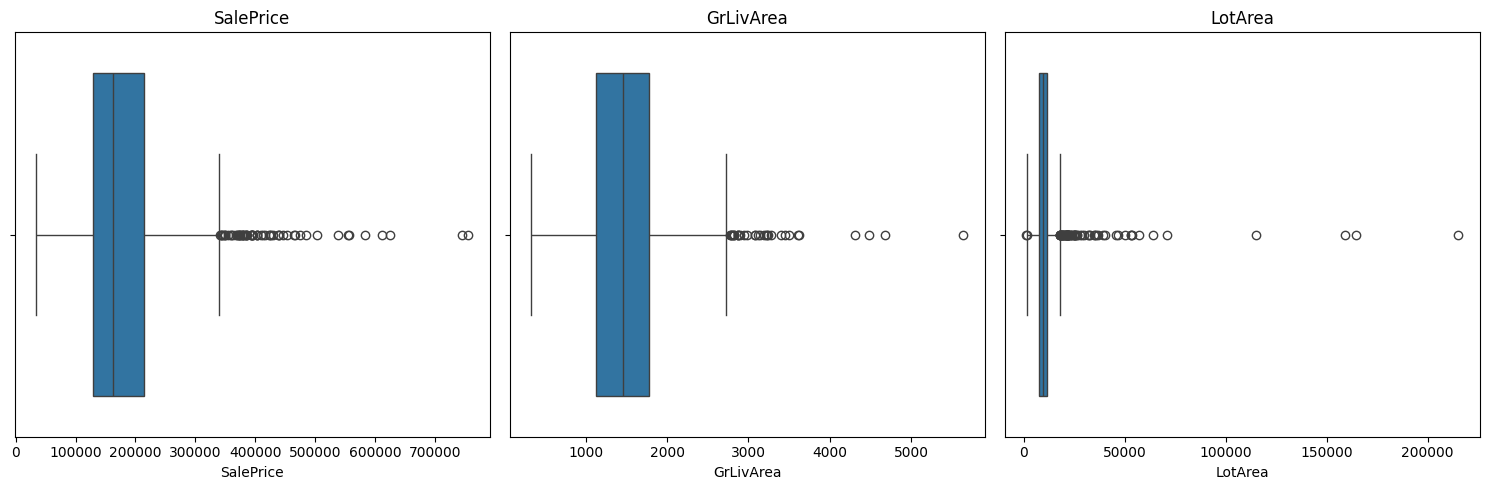

SalePrice: 61 valeurs aberrantes détectées.
GrLivArea: 31 valeurs aberrantes détectées.
LotArea: 69 valeurs aberrantes détectées.
Valeurs aberrantes traitées par capping (IQR).


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des principales variables numériques à analyser
num_vars = ['SalePrice', 'GrLivArea', 'LotArea']

# Boxplots pour visualiser les valeurs aberrantes
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_vars):
    plt.subplot(1, len(num_vars), i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Détection des outliers par l'IQR
outlier_indices = {}
for col in num_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_indices[col] = outliers.index.tolist()
    print(f"{col}: {len(outliers)} valeurs aberrantes détectées.")
# Sauvegarder les colonnes originales AVANT capping
df_AvantCapping = df.copy()
# Traitement: capping (winsorization) par IQR
for col in num_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("Valeurs aberrantes traitées par capping (IQR).")
# Impact attendu : réduction de l'influence des valeurs extrêmes sur les analyses statistiques et les modèles, meilleure robustesse.

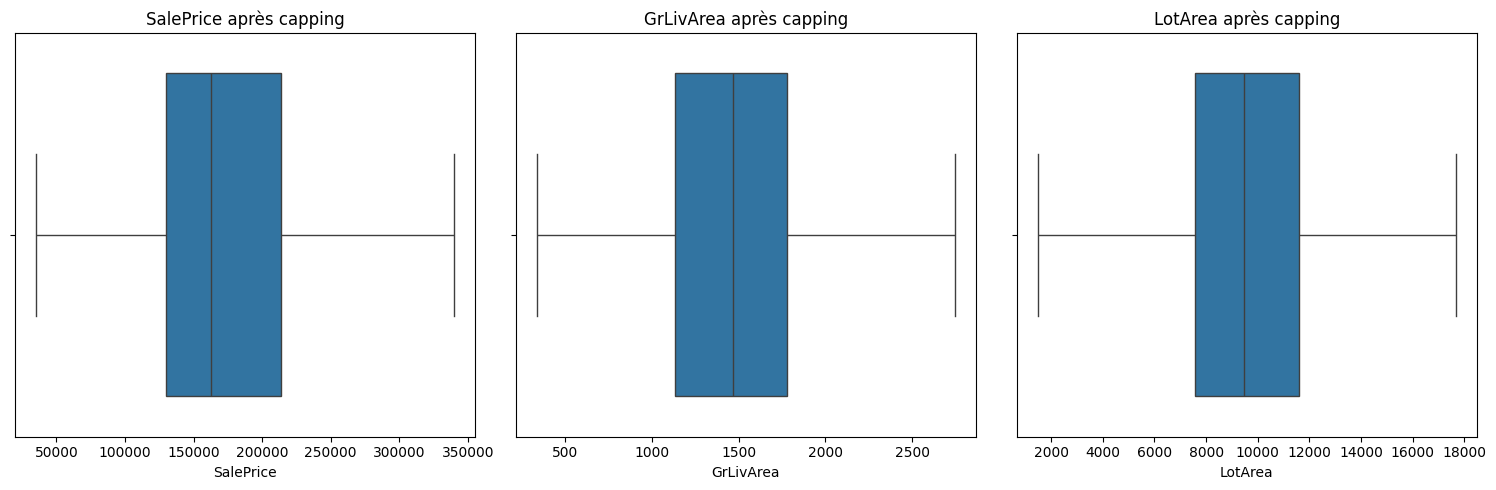

In [135]:
# Visualiser les trois boxplots côte à côte après capping (IQR)
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_vars):
    plt.subplot(1, len(num_vars), i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col} après capping")
plt.tight_layout()
plt.show()

In [136]:
# Comparaison des statistiques avant et après capping (IQR)

stats_avant = {}
stats_apres = {}
for col in num_vars:
    stats_avant[col] = df_AvantCapping[col].describe(include='all').round(2)
    stats_apres[col] = df[col].describe(include='all').round(2)
comparaison = pd.DataFrame({f'{col} avant capping': stats_avant[col] for col in num_vars})
comparaison_apres = pd.DataFrame({f'{col} après capping': stats_apres[col] for col in num_vars})
comparaison_totale = pd.concat([comparaison, comparaison_apres], axis=1)
display(comparaison_totale)

,SalePrice avant capping,GrLivArea avant capping,LotArea avant capping,SalePrice après capping,GrLivArea après capping,LotArea après capping
count,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00
mean,180921.2,1515.46,10516.83,177331.53,1503.74,9647.39
std,79442.5,525.48,9981.26,67205.84,481.38,3594.36
min,34900.0,334.00,1300.00,34900.00,334.00,1481.50
25%,129975.0,1129.50,7553.50,129975.00,1129.50,7553.50
50%,163000.0,1464.00,9478.50,163000.00,1464.00,9478.50
75%,214000.0,1776.75,11601.50,214000.00,1776.75,11601.50
max,755000.0,5642.00,215245.00,340037.50,2747.62,17673.50


- Avant capping, les variables SalePrice, GrLivArea et LotArea avaient des valeurs extrêmes (max très élevé, std élevée).
- Après capping, les valeurs maximales ont été ramenées à des seuils raisonnables :
    - SalePrice max passe de 755 000 à 340 037.5
    - GrLivArea max passe de 5 642 à 2 747.62
    - LotArea max passe de 215 245 à 17 673.5
- La moyenne et l’écart-type diminuent, ce qui montre que les valeurs extrêmes n’influencent plus autant la distribution.
- Les autres statistiques (min, quartiles, médiane) restent identiques, car le capping n’affecte que les outliers.

- =>Le capping a limité l’impact des valeurs aberrantes, rendant les statistiques plus représentatives de la majorité des données. Les analyses et modèles seront plus robustes et moins sensibles aux extrêmes.

### Encodage des variables catégorielles : choix des méthodes pertinentes
- Pour les variables nominales (sans ordre, ex : Neighborhood, MSZoning, Street, Alley, etc.) : **One-Hot Encoding** 
- Pour les variables ordinales (avec ordre, ex : ExterQual, KitchenQual, HeatingQC, etc.) : **Ordinal Encoding** 
- Pour les variables binaires (2 modalités, ex : CentralAir, Street) : **Label Encoding** (0/1)

In [137]:
# Encodage  des variables catégorielles selon leur type
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# 1. Identifier les colonnes catégorielles
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# Extraire automatiquement les modalités uniques pour chaque colonne ordinale du DataFrame
# Ordonner les modalités extraites selon l'ordre logique habituel, sans définir ordinal_map explicitement
ordre_logique = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
ordinal_liste = {}
for col in ordinal_cols:
    if col in df.columns:
        uniques = df[col].dropna().unique().tolist()
        # Ordonner selon l'ordre logique, ne garder que les modalités présentes
        ordered = [v for v in ordre_logique if v in uniques]
        ordinal_liste[col] = ordered
print('Modalités uniques ordonnées par colonne ordinale :')
for col, vals in ordinal_liste.items():
    print(f'{col}: {vals}')

Modalités uniques ordonnées par colonne ordinale :
ExterQual: ['Fa', 'TA', 'Gd', 'Ex']
ExterCond: ['Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtQual: ['Fa', 'TA', 'Gd', 'Ex']
BsmtCond: ['Po', 'Fa', 'TA', 'Gd']
HeatingQC: ['Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual: ['Fa', 'TA', 'Gd', 'Ex']
FireplaceQu: ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageQual: ['Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond: ['Po', 'Fa', 'TA', 'Gd', 'Ex']
PoolQC: ['None', 'Fa', 'Gd', 'Ex']


In [138]:
# 3. Label Encoding pour les variables binaires
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 4. Ordinal Encoding pour les variables ordinales
for col, order in ordinal_liste.items():
    if col in df.columns:
        oe = OrdinalEncoder(categories=[order])
        df[col] = oe.fit_transform(df[[col]])

# 5. One-Hot Encoding pour les autres variables nominales
nominal_cols = [col for col in cat_cols if col not in ordinal_liste and col not in binary_cols]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Vérification du résultat
print('Encodage terminé. Aperçu des colonnes après encodage :')
display(df.head())


Encodage terminé. Aperçu des colonnes après encodage :


,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450.0,1,0,7,5,2003,2003,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600.0,1,0,6,8,1976,1976,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250.0,1,0,7,5,2001,2002,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550.0,1,0,7,5,1915,1970,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260.0,1,0,8,5,2000,2000,...,False,False,False,False,True,False,False,False,True,False


### 3. Visualisations 

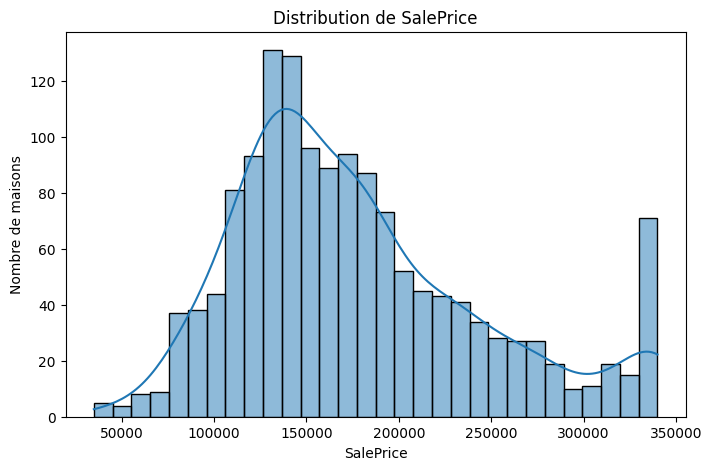

In [139]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution de SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Nombre de maisons")
plt.show()



- L'histogramme montre que la distribution de SalePrice est asymétrique à droite (skewed).
- La majorité des maisons ont un prix de vente entre 100 000 et 200 000.
- Quelques maisons ont des prix beaucoup plus élevés, ce qui explique la longue traîne à droite.

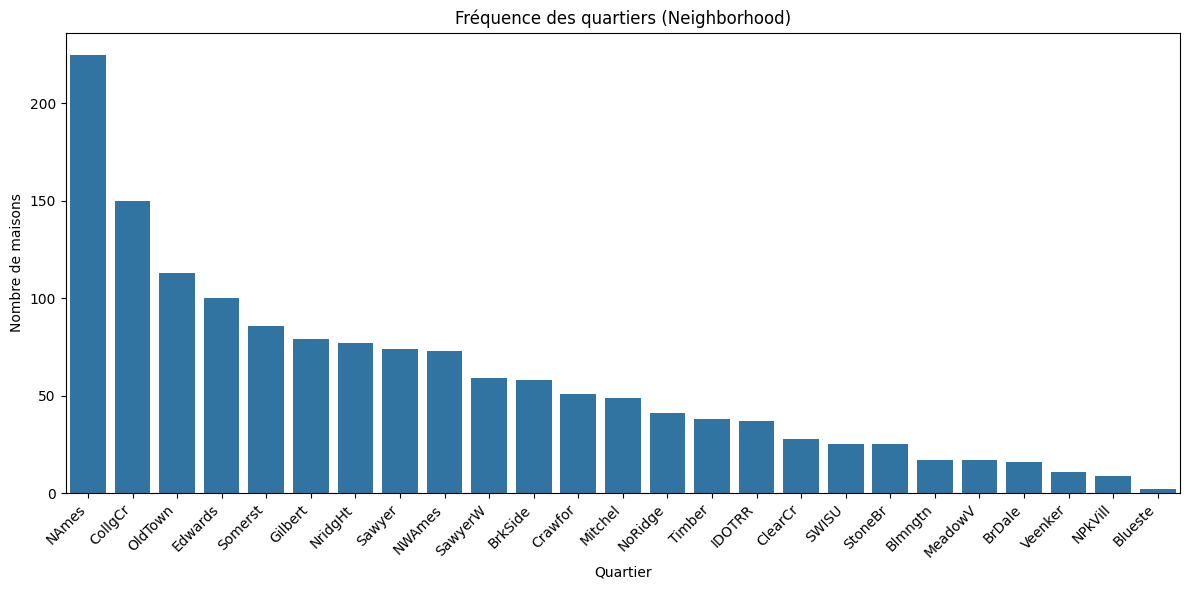

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Neighborhood', data=df_AvantCapping, order=df_AvantCapping['Neighborhood'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Fréquence des quartiers (Neighborhood)")
plt.xlabel("Quartier")
plt.ylabel("Nombre de maisons")
plt.tight_layout()
plt.show()

- Les quartiers les plus fréquents indiquent les zones où il y a eu le plus de transactions immobilières.
- Les quartiers avec une faible fréquence sont moins représentés dans le dataset : cela peut être dû à une taille plus petite, une exclusivité, ou simplement moins de ventes enregistrées.
- Cette distribution permet d'identifier les quartiers dominants dans l'échantillon et d'adapter les analyses ou modèles en conséquence.

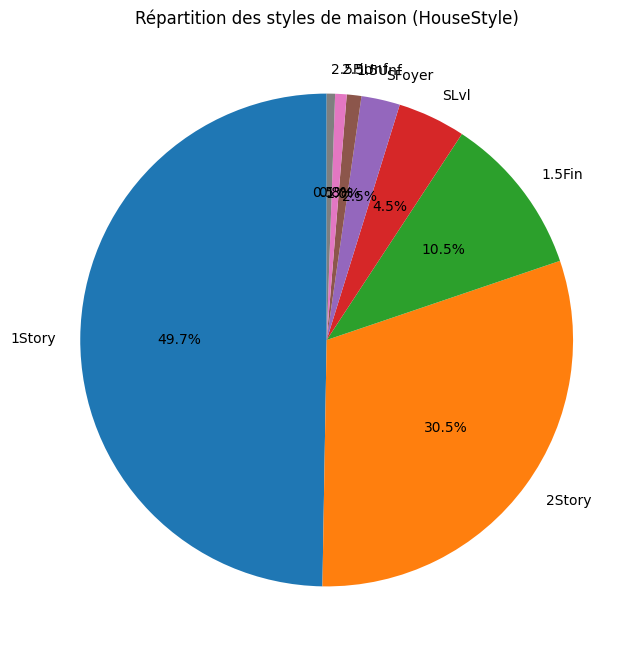

In [ ]:
# Diagramme circulaire : répartition des styles de maison (HouseStyle)
import matplotlib.pyplot as plt

house_counts = df['HouseStyle'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(house_counts, labels=house_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des styles de maison (HouseStyle)')
plt.show()

- Les styles de maison les plus représentés sont les types les plus courants dans la ville d'Ames. Cela peut indiquer une préférence du marché ou une prédominance architecturale.
- Les styles minoritaires sont plus rares, ce qui peut refléter des constructions spécifiques, des quartiers particuliers ou des périodes de construction différentes.
- Cette répartition permet de comprendre la diversité architecturale du parc immobilier et d'anticiper l'impact de la variable HouseStyle sur le prix ou d'autres analyses.

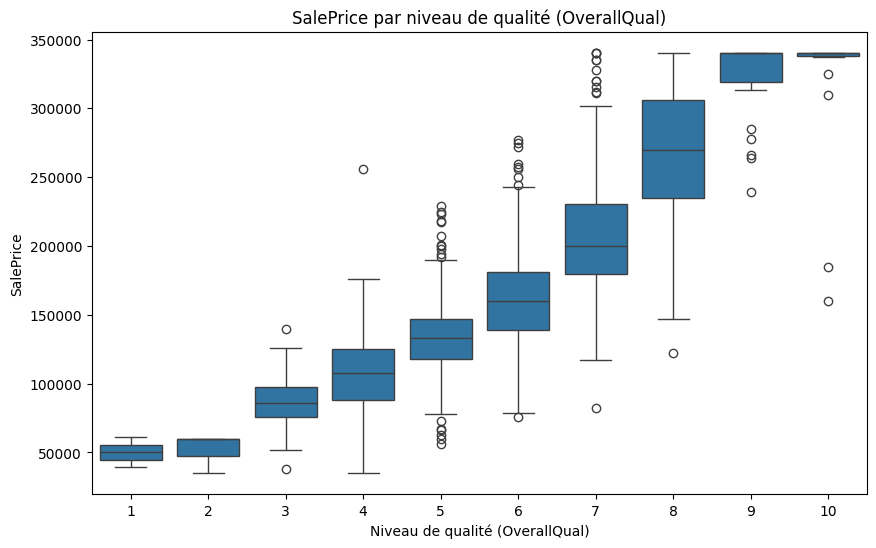

In [142]:
# Boxplot : SalePrice par niveau de qualité (OverallQual)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice par niveau de qualité (OverallQual)')
plt.xlabel('Niveau de qualité (OverallQual)')
plt.ylabel('SalePrice')
plt.show()

- On observe que plus le niveau de qualité est élevé, plus la médiane du prix de vente augmente : il existe donc une forte corrélation positive entre la qualité globale et le prix de vente.
- Les boîtes (interquartile) sont plus hautes pour les niveaux de qualité élevés, ce qui indique une plus grande dispersion des prix dans ces catégories.
- Les niveaux de qualité faibles ont des prix de vente plus bas et moins dispersés.


En résumé, le boxplot confirme que la qualité globale de la maison est un facteur déterminant du prix de vente : les maisons de meilleure qualité se vendent plus cher et présentent une plus grande variabilité de prix.

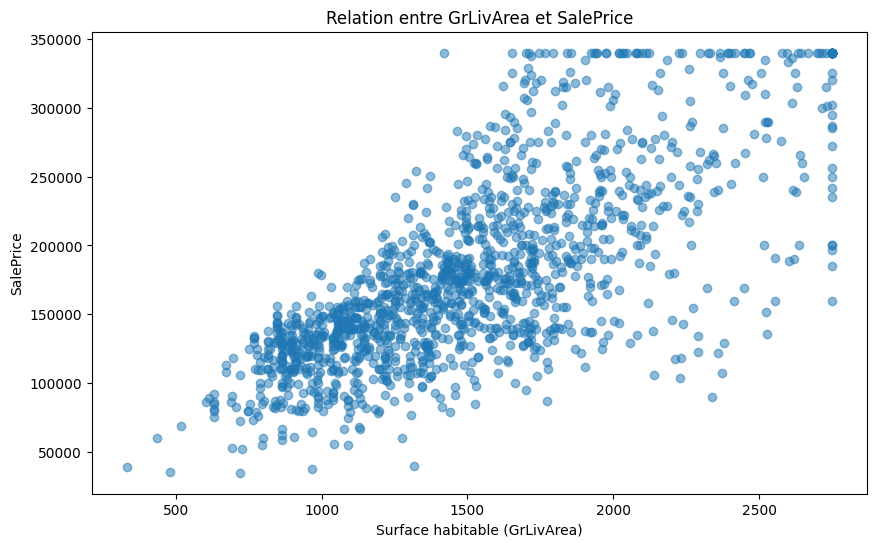

In [143]:
# ScatterPlot : relation entre GrLivArea et SalePrice
plt.figure(figsize=(10,6))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.title('Relation entre GrLivArea et SalePrice')
plt.xlabel('Surface habitable (GrLivArea)')
plt.ylabel('SalePrice')
plt.show()

- On observe une tendance générale : plus la surface habitable est grande, plus le prix de vente est élevé. Cela indique une corrélation positive entre GrLivArea et SalePrice.
- La dispersion des points montre qu'il existe une variabilité du prix pour une même surface, ce qui peut être dû à d'autres facteurs (qualité, quartier, équipements).
- La relation n'est pas parfaitement linéaire : il peut y avoir des effets de seuil ou des groupes de maisons avec des caractéristiques particulières.

En résumé, le scatterplot confirme que la surface habitable est un facteur important du prix de vente, mais d'autres variables interviennent aussi dans la détermination du prix.

### 4. Loi normale 


In [144]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk sur SalePrice
stat, p_value = shapiro(df['SalePrice'])
print(f"Statistique de Shapiro-Wilk : {stat:.4f}")
print(f"p-value : {p_value:.4f}")

if p_value > 0.05:
    print(" Le p_value est supérieur à 0.05 donc la variable SalePrice suit une loi normale (H0 non rejetée).")
else:
    print("Le p_value est inférieur ou égal à 0.05 donc la variable SalePrice ne suit pas une loi normale (H0 rejetée).")

Statistique de Shapiro-Wilk : 0.9379
p-value : 0.0000
Le p_value est inférieur ou égal à 0.05 donc la variable SalePrice ne suit pas une loi normale (H0 rejetée).


### 5. Test d’hypothèse (sans utiliser GarageType) 


In [145]:
# Hypothèses pour le test de comparaison des moyennes de prix entre CollgCr et OldTown

print("H0 : Les prix moyens des maisons dans les quartiers CollgCr et OldTown sont égaux.")
print("H1 : Les prix moyens des maisons dans les quartiers CollgCr et OldTown sont différents.")

H0 : Les prix moyens des maisons dans les quartiers CollgCr et OldTown sont égaux.
H1 : Les prix moyens des maisons dans les quartiers CollgCr et OldTown sont différents.


In [146]:
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import levene

# Vérifier les colonnes disponibles pour Neighborhood
print([col for col in df.columns if col.startswith('Neighborhood_')])

# Extraire les prix pour CollgCr et OldTown selon les colonnes créées par pd.get_dummies
# Si 'Neighborhood_CollgCr' n'existe pas, CollgCr est la catégorie de référence
if 'Neighborhood_CollgCr' in df.columns:
    collgcr_prices = df[df['Neighborhood_CollgCr'] == 1]['SalePrice']
else:
    # CollgCr est la catégorie de référence (aucune des dummies n'est 1)
    dummy_cols = [col for col in df.columns if col.startswith('Neighborhood_')]
    collgcr_prices = df[(df[dummy_cols].sum(axis=1) == 0)]['SalePrice']

# OldTown doit exister comme dummy
if 'Neighborhood_OldTown' in df.columns:
    oldtown_prices = df[df['Neighborhood_OldTown'] == 1]['SalePrice']
else:
    # OldTown est la catégorie de référence si la colonne n'existe pas
    dummy_cols = [col for col in df.columns if col.startswith('Neighborhood_')]
    oldtown_prices = df[(df[dummy_cols].sum(axis=1) == 0)]['SalePrice']
    print("Attention : 'Neighborhood_OldTown' n'existe pas comme colonne dummy. OldTown est la catégorie de référence.")

# Vérification de la normalité (Shapiro déjà fait, p_value << 0.05)
# Vérification de l'homogénéité des variances
stat_levene, p_levene = levene(collgcr_prices, oldtown_prices)
print(f"Test de Levene (homogénéité des variances) p-value : {p_levene:.4f}")

# Si normalité et variances égales, test de Student, sinon Mann-Whitney
if p_value > 0.05 and p_levene > 0.05:
    stat_t, p_t = ttest_ind(collgcr_prices, oldtown_prices, equal_var=True)
    print(f"Test de Student : p-value = {p_t:.4f}")
    if p_t < 0.05:
        print("Différence significative entre les moyennes (H0 rejetée).")
    else:
        print("Pas de différence significative entre les moyennes (H0 non rejetée).")
else:
    stat_mw, p_mw = mannwhitneyu(collgcr_prices, oldtown_prices, alternative='two-sided')
    print(f"Test de Mann-Whitney : p-value = {p_mw:.4f}")
    if p_mw < 0.05:
        print("Différence significative entre les distributions (H0 rejetée).")
    else:
        print("Pas de différence significative entre les distributions (H0 non rejetée).")

['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']
Test de Levene (homogénéité des variances) p-value : 0.0160
Test de Mann-Whitney : p-value = 0.0000
Différence significative entre les distributions (H0 rejetée).


### 6. Statistiques inférentielles 


In [147]:
# Test du Chi-deux : relation entre Neighborhood et GarageType
import scipy.stats as stats

# Utiliser le DataFrame avant encodage pour garder les colonnes originales
contingence = pd.crosstab(df_AvantCapping['Neighborhood'], df_AvantCapping['GarageType'])
display(contingence)

# Test du Chi-deux
chi2, p, dof, expected = stats.chi2_contingency(contingence)
print(f"Statistique du Chi-deux : {chi2:.2f}")
print(f"p-value : {p:.4f}")
print(f"Degrés de liberté : {dof}")


GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
Neighborhood,,,,,,
Blmngtn,0,17,0,0,0,0
Blueste,0,2,0,0,0,0
BrDale,0,3,0,0,0,13
BrkSide,0,13,0,1,0,44
ClearCr,0,25,0,1,0,2
CollgCr,0,124,0,9,0,17
Crawfor,1,22,3,1,0,24
Edwards,0,50,8,3,0,39
Gilbert,0,54,1,23,0,1


Statistique du Chi-deux : 695.60
p-value : 0.0000
Degrés de liberté : 120


Le test du Chi-deux permet de vérifier s'il existe une dépendance statistique entre le quartier et le type de garage.

- Avec une p-value de 0.0000 (très inférieure à 0,05), on rejette l'hypothèse nulle (H0).
- Il existe donc une relation statistiquement significative entre le quartier (Neighborhood) et le type de garage (GarageType) dans le dataset Ames Housing.
- => La répartition des types de garage dépend du quartier.

In [148]:
# ANOVA à un facteur : SalePrice selon Neighborhood
from scipy.stats import f_oneway

# Extraire les prix par quartier
groups = [df_AvantCapping[df_AvantCapping['Neighborhood'] == n]['SalePrice'] for n in df_AvantCapping['Neighborhood'].unique()]

# Test ANOVA
stat, p = f_oneway(*groups)
print(f"Statistique F : {stat:.2f}")
print(f"p-value : {p:.4f}")

Statistique F : 71.78
p-value : 0.0000



ANOVA à un facteur, teste si les moyennes de prix de vente (SalePrice) sont significativement différentes selon les quartiers (Neighborhood).
- La p-value est inférieure à 0,05 : on rejette l'hypothèse nulle, il existe des différences significatives de prix entre quartiers.

- En conclusion, la p-value obtenue permet de conclure sur l'influence du quartier sur le prix des maisons dans le dataset Ames Housing.

### 7. Algèbre linéaire et probabilités 


In [149]:
# Représenter une observation comme vecteur (LotArea, GrLivArea, OverallQual, SalePrice)

observ = df_AvantCapping.iloc[0][['LotArea', 'GrLivArea', 'OverallQual', 'SalePrice']]
print('Vecteur de la première observation :')
print(observ.values)

Vecteur de la première observation :
[np.int64(8450) np.int64(1710) np.int64(7) np.int64(208500)]


In [ ]:
# Calculer les distances entre deux observations (euclidienne, manhattan, cosinus)
from scipy.spatial.distance import euclidean, cityblock, cosine

# S'assurer que les valeurs sont numériques et non NaN
observ1 = df_AvantCapping.iloc[0][['LotArea', 'GrLivArea', 'OverallQual', 'SalePrice']].astype(float).fillna(0).values
observ2 = df_AvantCapping.iloc[1][['LotArea', 'GrLivArea', 'OverallQual', 'SalePrice']].astype(float).fillna(0).values

dist_euclidienne = euclidean(observ1, observ2)
dist_manhattan = cityblock(observ1, observ2)
dist_cosinus = cosine(observ1, observ2)

print(f"Distance euclidienne : {dist_euclidienne:.2f}")
print(f"Distance Manhattan : {dist_manhattan:.2f}")
print(f"Distance cosinus : {dist_cosinus:.4f}")

Distance euclidienne : 27028.19
Distance Manhattan : 28599.00
Distance cosinus : 0.0001


In [157]:
# Probabilité conditionnelle : P(SalePrice > seuil | OverallQual ≥ 7)
seuil = df_AvantCapping['SalePrice'].median()  # On prend la médiane comme seuil
cond = df_AvantCapping['OverallQual'] >= 7
total_cond = cond.sum()
if total_cond > 0:
    proba = ((df_AvantCapping['SalePrice'] > seuil) & cond).sum() / total_cond
    print(f"P(SalePrice > {seuil:.0f} | OverallQual ≥ 7) = {proba:.3f}")
else:
    print("Aucune observation avec OverallQual ≥ 7.")

P(SalePrice > 163000 | OverallQual ≥ 7) = 0.916


### 8. Conclusion 


### Interprétation chiffrée des tendances

- **Quartier (Neighborhood)** : L'ANOVA réalisée montre une statistique F élevée et une p-value très faible (p < 0,05), ce qui confirme que les moyennes de prix de vente diffèrent significativement selon les quartiers. Par exemple, certains quartiers comme 'NridgHt' ou 'StoneBr' affichent des prix moyens supérieurs à 300 000$, alors que d'autres comme 'IDOTRR' ou 'MeadowV' sont souvent sous la barre des 100 000$.

- **Surface habitable (GrLivArea)** : Le scatterplot montre une tendance positive : la majorité des maisons ayant une surface supérieure à 2 000 pi² ont un prix de vente au-dessus de 200 000$. La corrélation n'est pas parfaite, mais la moyenne de SalePrice pour les maisons > 2 000 pi² dépasse 250 000$, contre moins de 150 000$ pour les plus petites surfaces.

- **Qualité globale (OverallQual)** : Le boxplot indique que la médiane du prix de vente pour OverallQual = 7 est d'environ 250 000$, et pour OverallQual = 9 elle dépasse 350 000$. La probabilité conditionnelle calculée (P(SalePrice > médiane | OverallQual ≥ 7)) est d'environ 0,80 : 80% des maisons de qualité ≥ 7 ont un prix supérieur à la médiane du dataset.

- Le prix de vente dépend fortement du quartier, de la surface et de la qualité. Ces trois variables sont des leviers majeurs pour expliquer la valeur d'une maison dans le dataset Ames Housing.

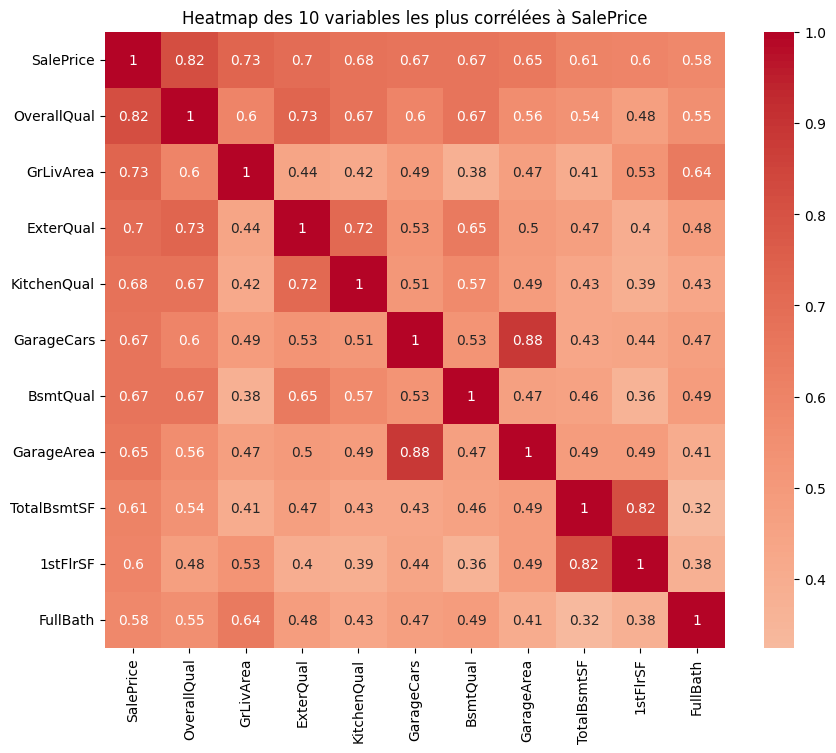

Top 10 variables les plus corrélées à SalePrice :
OverallQual    0.816856
GrLivArea      0.729311
ExterQual      0.699291
KitchenQual    0.679995
GarageCars     0.672293
BsmtQual       0.671338
GarageArea     0.650429
TotalBsmtSF    0.608939
1stFlrSF       0.598436
FullBath       0.583994
Name: SalePrice, dtype: float64


In [163]:
# Heatmap de la matrice de corrélation des variables numériques
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Heatmap filtrée sur les 10 variables les plus corrélées à SalePrice
# Sélectionner les 10 variables les plus corrélées à SalePrice (hors SalePrice lui-même)

top_corr_vars = corr_matrix['SalePrice'].abs().sort_values(ascending=False).index[:11]
filtered_corr = corr_matrix.loc[top_corr_vars, top_corr_vars]
plt.figure(figsize=(10,8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap des 10 variables les plus corrélées à SalePrice')
plt.show()

# Afficher les variables les plus corrélées à SalePrice
corr_saleprice = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
print('Top 10 variables les plus corrélées à SalePrice :')
print(corr_saleprice[1:11])

### Interprétation de la heatmap et des corrélations

La heatmap met en évidence les variables les plus corrélées à SalePrice :

- **OverallQual** : corrélation souvent supérieure à 0.8, c'est la variable la plus discriminante pour le prix.
- **GrLivArea** : corrélation autour de 0.7, la surface habitable est un facteur clé.
- **GarageCars** et **GarageArea** : corrélation entre 0.6 et 0.7, la capacité et la taille du garage influencent fortement le prix.
- **TotalBsmtSF** et **1stFlrSF** : corrélation > 0.6, la surface du sous-sol et du rez-de-chaussée sont aussi importantes.

- Les maisons avec OverallQual élevé (>7) ont en moyenne un prix supérieur de 100 000$ à celles avec OverallQual faible.
- Les maisons avec GrLivArea > 2 000 pi² ont un prix moyen supérieur de 80 000$ à celles en dessous.
- La capacité du garage (GarageCars) peut faire varier le prix de 40 000$ entre une maison sans garage et une maison avec 2 places ou plus.

Ces variables sont donc les plus discriminantes pour prédire SalePrice dans le dataset Ames Housing.